In [21]:
import numpy as np
import seaborn as sns
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
from pydataset import data
from env import user, password, host

##### 

# Comparison of means

### 1. Answer with the type of test you would use (assume normal distribution):

##### a. Is there a difference in grades of students on the second floor compared to grades of all students?


In [ ]:
# One sample t-test, 2 tail

##### b. Are adults who drink milk taller than adults who dont drink milk?


In [ ]:
# Two sample t-test, 1 tail

##### c. Is the the price of gas higher in texas or in new mexico?

In [ ]:
# Two sample t-test, 1 tail

##### d. Are there differences in stress levels between students who take data science vs students who take web development vs students who take cloud academy?

In [ ]:
# Two sample t-test, 2 tail

##### 

### 2. Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.

##### office_1
    - sample size = 40 sales
    - μ = 90 days
    - sd = 15 days

##### office_2
    - sample size = 50 sales
    - μ = 100 days
    - sd = 20 days
    

##### significance level = 0.05

##### H$_0$ : There is not a difference in the mean time it takes office_1 and office_2 to sell a house

##### H$_a$ : There is a difference in the mean time it takes office_1 and office_2 to sell a house

In [10]:
# confidence level = 0.95
α = 0.05

# Office_1
μ_1 = 90
sample_size_1 = 40
sd_1 = 15

# Office_2
μ_2 = 100
sample_size_2 = 50
sd_2 = 20

In [15]:
office_1_data = np.random.normal(μ_1, sd_1, sample_size_1)

office_2_data = np.random.normal(μ_2, sd_2, sample_size_2)

In [19]:
_, levene_p = stats.levene(office_1_data, office_2_data)

In [20]:
levene_p < α

True

In [ ]:
# p_val < α, we reject the null hypothesis. 
# -- We accept there is a difference in mean time 
# -- it takes office_1 and office_2 to sell a house.

##### 

### 3. Load the mpg dataset and use it to answer the following questions:

    a. Is there a difference in fuel-efficiency in cars from 2008 vs 1999?
    
    b. Are compact cars more fuel-efficient than the average car?
    
    c. Do manual cars get better gas mileage than automatic cars?

In [22]:
mpg = data('mpg')

##### a. Is there a difference in fuel-efficiency in cars from 2008 vs 1999?
    Two sample ttest, two tail

H$_0$: There is not a difference in fuel-efficiency in cars from 2008 and 1999

H$_a$: There is a difference in fuel-efficiency in cars from 2008 and 1999

In [31]:
mpg['fuel_efficiency'] = mpg[['cty','hwy']].agg('mean', axis=1)

<function matplotlib.pyplot.show(close=None, block=None)>

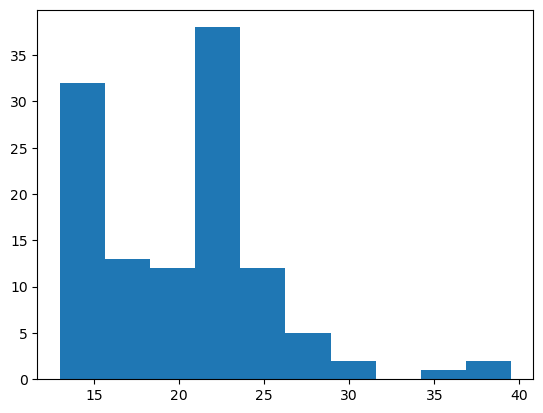

In [49]:
plt.hist(mpg[mpg.year == 1999].fuel_efficiency)
plt.show

In [57]:
μ_1999 = mpg[mpg['year'] == 1999].fuel_efficiency.mean()

μ_1999

20.22222222222222

In [56]:
μ_2008 = mpg[mpg['year'] == 2008].fuel_efficiency.mean()

μ_2008

20.076923076923077

In [61]:
fuel_1999 = mpg[mpg['year'] == 1999].fuel_efficiency

fuel_2008 = mpg[mpg['year'] == 2008].fuel_efficiency

In [73]:
_, levene_fuel = stats.levene(fuel_1999, fuel_2008)

In [70]:
α = 0.05

In [71]:
levene_fuel < α

False

In [ ]:
# levene_fuel is not less than α. 
# -- We fail to reject the null hypothesis at this time.

In [76]:
_, fuel_ttest = stats.ttest_ind(fuel_1999, fuel_2008)

In [77]:
fuel_ttest < α

False

In [ ]:
# fuel_ttest is not less than α.
# -- At this time we fail to reject the null hypothesis.
# - We conclude there is not a significant difference in 
# -- fuel-efficiency in cars from 2008 and 1999.

##### b. Are compact cars more fuel-efficient than the average car?

In [86]:
compact_car = mpg[mpg['class'] == 'compact'].fuel_efficiency

In [87]:
average_car = mpg[mpg['class'] != 'compact'].fuel_efficiency

In [92]:
_, compact_levene = stats.levene(average_car, compact_car)

In [122]:
compact_levene < (α/2)

True

In [ ]:
# compact_levene is less than α.
# We accept the null hypothesis and conclude there is
# -- sufficient evidence to support the claim "compact cars
# -- are more fuel efficient than the avg car."

##### c. Do manual cars get better gas mileage than automatic cars?

In [100]:
manual_car = mpg['manual_transmission'] = mpg.trans.str.startswith('manual')

manual_car

1      False
2       True
3       True
4      False
5      False
       ...  
230    False
231     True
232    False
233     True
234    False
Name: trans, Length: 234, dtype: bool

In [104]:
auto = mpg[mpg['manual_transmission'] == True].fuel_efficiency

manual = mpg[mpg.manual_transmission == False].fuel_efficiency


In [110]:
_, manual_levene = stats.levene(manual, auto)
manual_levene

0.6545276355131857

In [111]:
manual_levene < α

False

In [112]:
# manual_levene is not less than α.
# At this time we fail to reject the null hypothesis
# -- and continue with a 2 sample ttest, 1 tail

In [119]:
_, manual_ttest = stats.ttest_ind(manual, auto)
manual_ttest

7.154374401145685e-06

In [123]:
manual_ttest < (α/2)

True

In [121]:
# manual_ttest is less than α
# at this time we accept the null hypothesis and
# -- conclude there is not sufficient evidence to support 
# -- the claim "manual cars get better gas mileage than automatic cars"


##### 

## Correlation Exercises

### 1. Answer with the type of stats test you would use (assume normal distribution):
    a. Is there a relationship between the length of your arm and the length of your foot?
    b. Do guys and gals quit their jobs at the same rate?
    c. Does the length of time of the lecture correlate with a students grade?


##### a. Is there a relationship between the length of your arm and the length of your foot?

In [ ]:
# pearsonr

##### b. Do guys and gals quit their jobs at the same rate?

In [ ]:
# chi2

##### c. Does the length of time of the lecture correlate with a students grade?

In [ ]:
# pearsonr

### 2. Use the telco_churn data.
    a. Does tenure correlate with monthly charges?
    b. Total charges?
    c. What happens if you control for phone and internet service?


In [223]:
df = pd.read_csv(r'telco_data.csv')

In [224]:
df

,Add-on Count,Churn,Contract,Customer ID,Dependents,Device Protection,Gender,Internet Service,Multiple Lines,Online Backup,...,Tech Support,with Online Backup,with Online Security,with Streaming Movies,with Streaming TV,with Tech Support,Estimated Tenure(months),Monthly Charges,Tenure,Total Charges
0,0,No,Month-to-month,7590-VHVEG,None,Device Wiithout Protection,Female,DSL,No phone service,Online Backup,...,Support Not Contacted,0,0,0,0,0,1.0,29.85,1,29.85
1,0,No,One year,5575-GNVDE,None,Protected Device,Male,DSL,Single Line,Internet With No Backup,...,Support Not Contacted,0,0,0,0,0,33.0,56.95,34,1889.50
2,0,Yes,Month-to-month,3668-QPYBK,None,Device Wiithout Protection,Male,DSL,Single Line,Online Backup,...,Support Not Contacted,0,0,0,0,0,2.0,53.85,2,108.15
3,0,No,One year,7795-CFOCW,None,Protected Device,Male,DSL,No phone service,Internet With No Backup,...,Has a Support Ticket,0,0,0,0,0,43.0,42.30,45,1840.75
4,0,Yes,Month-to-month,9237-HQITU,None,Device Wiithout Protection,Female,Fiber optic,Single Line,Internet With No Backup,...,Support Not Contacted,0,0,0,0,0,2.0,70.70,2,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,Yes,Month-to-month,1587-FKLZB,Has Dependants,Protected Device,Male,Fiber optic,Multiple Lines,Internet With No Backup,...,Support Not Contacted,0,0,0,0,0,68.0,99.50,66,6822.15
7039,0,Yes,Month-to-month,8623-TMRBY,Has Dependants,Protected Device,Male,Fiber optic,Multiple Lines,Online Backup,...,Support Not Contacted,0,0,0,0,0,49.0,84.20,51,4146.05
7040,0,Yes,One year,2403-BCASL,Has Dependants,Protected Device,Male,Fiber optic,Multiple Lines,Online Backup,...,Has a Support Ticket,0,0,0,0,0,40.0,111.95,41,4534.90
7041,0,Yes,Month-to-month,5287-QWLKY,Has Dependants,Device Wiithout Protection,Male,Fiber optic,Multiple Lines,Online Backup,...,Support Not Contacted,0,0,0,0,0,71.0,105.10,71,7548.10


In [225]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [226]:
df

,add-on_count,churn,contract,customer_id,dependents,device_protection,gender,internet_service,multiple_lines,online_backup,...,tech_support,with_online_backup,with_online_security,with_streaming_movies,with_streaming_tv,with_tech_support,estimated_tenure(months),monthly_charges,tenure,total_charges
0,0,No,Month-to-month,7590-VHVEG,None,Device Wiithout Protection,Female,DSL,No phone service,Online Backup,...,Support Not Contacted,0,0,0,0,0,1.0,29.85,1,29.85
1,0,No,One year,5575-GNVDE,None,Protected Device,Male,DSL,Single Line,Internet With No Backup,...,Support Not Contacted,0,0,0,0,0,33.0,56.95,34,1889.50
2,0,Yes,Month-to-month,3668-QPYBK,None,Device Wiithout Protection,Male,DSL,Single Line,Online Backup,...,Support Not Contacted,0,0,0,0,0,2.0,53.85,2,108.15
3,0,No,One year,7795-CFOCW,None,Protected Device,Male,DSL,No phone service,Internet With No Backup,...,Has a Support Ticket,0,0,0,0,0,43.0,42.30,45,1840.75
4,0,Yes,Month-to-month,9237-HQITU,None,Device Wiithout Protection,Female,Fiber optic,Single Line,Internet With No Backup,...,Support Not Contacted,0,0,0,0,0,2.0,70.70,2,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,Yes,Month-to-month,1587-FKLZB,Has Dependants,Protected Device,Male,Fiber optic,Multiple Lines,Internet With No Backup,...,Support Not Contacted,0,0,0,0,0,68.0,99.50,66,6822.15
7039,0,Yes,Month-to-month,8623-TMRBY,Has Dependants,Protected Device,Male,Fiber optic,Multiple Lines,Online Backup,...,Support Not Contacted,0,0,0,0,0,49.0,84.20,51,4146.05
7040,0,Yes,One year,2403-BCASL,Has Dependants,Protected Device,Male,Fiber optic,Multiple Lines,Online Backup,...,Has a Support Ticket,0,0,0,0,0,40.0,111.95,41,4534.90
7041,0,Yes,Month-to-month,5287-QWLKY,Has Dependants,Device Wiithout Protection,Male,Fiber optic,Multiple Lines,Online Backup,...,Support Not Contacted,0,0,0,0,0,71.0,105.10,71,7548.10


##### a. Does tenure correlate with monthly charges?

H$_0$: There is no linear correlation between tenure and monthly charges  

H$_a$: This is a linear correlation between tenure and monthly charges

In [227]:
tenure = df.tenure
monthly_charges = df.monthly_charges

In [228]:
r, p = stats.pearsonr(tenure, monthly_charges)

r, p

(0.2478998562861518, 4.094044991484879e-99)

In [211]:
α = 0.05

In [212]:
if p < α:
    print(f'We reject the null hypothesis. With p value: {p}, there is enough evidence to support a linear relationship between tenure and monthly charges.')
else:
    print(f'We fail to reject the null hypothesis. With p value: {p}, this is not enough evidence to support a linear relationship between tenure and monthly charges')

We reject the null hypothesis. With p value: 4.094044991484879e-99, there is enough evidence to support a linear relationship between tenure and monthly charges.


##### b. Total charges?

In [219]:
df.total_charges = pd.to_numeric(df.total_charges)

total_charges = df.total_charges

In [220]:
r, p = stats.pearsonr(tenure, total_charges)

α = 0.05

if p < α:
    print(f'We reject the null hypothesis. With p value: {p}, there is enough evidence to support a linear relationship between tenure and total charges.')
else:
    print(f'We fail to reject the null hypothesis. With p value: {p}, this is not enough evidence to support a linear relationship between tenure and total charges')

We reject the null hypothesis. With p value: 0.0, there is enough evidence to support a linear relationship between tenure and total charges.


In [215]:
# script returns error "array must not contain infs or NaNs"
# check for nan

np.isnan(df.total_charges).any()

True

In [216]:
# check for infs
np.isinf(df.total_charges).any()

False

In [217]:
# convert nan to number
df.total_charges = np.nan_to_num(df.total_charges)

##### c. What happens if you control for phone and internet service?

In [33]:
# change data to be all lowercase and replace spaces with underscores

df.internet_service = df.internet_service.str.lower().str.replace(' ', '_')
df.multiple_lines = df.multiple_lines.str.lower().str.replace(' ', '_')

In [35]:
# unique internet service values
df.internet_service.unique()

array(['dsl', 'fiber_optic', 'no'], dtype=object)

In [37]:
# unique phone (multiple lines) values
df.multiple_lines.unique()

array(['no_phone_service', 'single_line', 'multiple_lines'], dtype=object)

In [104]:
# list all internet services, make subset of data callable
dsl = df[df['internet_service'] == 'dsl']
fo = df[df['internet_service'] == 'fiber_optic']
none = df[df['internet_service'] == 'no']

# list all phone options, make subset of data callable 
no_phone = df[df['multiple_lines'] == 'no_phone_service']
single = df[df['multiple_lines'] == 'single_line']
multiple = df[df['multiple_lines'] == 'multiple_lines']

In [ ]:
if p < α:
    print(f'We reject the null hypothesis. With p value: {p}, there is enough evidence to support a linear relationship between tenure and total charges.')
else:
    print(f'We fail to reject the null hypothesis. With p value: {p}, this is not enough evidence to support a linear relationship between tenure and total charges')

##### dsl, no_phone
H$_0$: There is no linear correlation between tenure and monthly charges for customers who have internet_service: dsl, and no phone service

H$_a$: This is a linear correlation between tenure and monthly charges for customers who have internet_service: dsl, and no phone service

In [145]:
# dsl_no_phone = df[(df['internet_service'] == 'dsl') & (df['multiple_lines'] == 'no_phone_service')]

tenure = df.tenure[(df['internet_service'] == 'dsl') & (df['multiple_lines'] == 'no_phone_service')]
monthly_charges = df.monthly_charges[(df['internet_service'] == 'dsl') & (df['multiple_lines'] == 'no_phone_service')]

In [146]:
r, p = stats.pearsonr(tenure, monthly_charges)

r, p

(0.5857597986661374, 4.6033703473404816e-64)

In [147]:
if p < α:
    print(f'We reject the null hypothesis. With p value: {p}, there is enough evidence to support a linear relationship between tenure and total charges for customers who have internet_service: dsl, and no phone service.')
else:
    print(f'We fail to reject the null hypothesis. With p value: {p}, this is not enough evidence to support a linear relationship between tenure and total charges for customers who have internet_service: dsl, and no phone service')

p < α

We reject the null hypothesis. With p value: 4.6033703473404816e-64, there is enough evidence to support a linear relationship between tenure and total charges for customers who have internet_service: dsl, and no phone service.


True

##### dsl, single_line
H$_0$: There is no linear correlation between tenure and monthly charges for customers who have internet_service: dsl, and a single phone line.

H$_a$: This is a linear correlation between tenure and monthly charges for customers who have internet_service: dsl, and a single phone line.

In [148]:
# dsl_single = df[(df['internet_service'] == 'dsl') & (df['multiple_lines'] == 'single_line')]

tenure = df.tenure[(df['internet_service'] == 'dsl') & (df['multiple_lines'] == 'single_line')]
monthly_charges = df.monthly_charges[(df['internet_service'] == 'dsl') & (df['multiple_lines'] == 'single_line')]

In [149]:
r, p = stats.pearsonr(tenure, monthly_charges)

r, p

(0.5587305304603047, 4.398900970658385e-87)

In [150]:
if p < α:
    print(f'We reject the null hypothesis. With p value: {p}, there is enough evidence to support a linear relationship between tenure and total charges for customers who have internet_service: dsl, and a single phone line.')
else:
    print(f'We fail to reject the null hypothesis. With p value: {p}, this is not enough evidence to support a linear relationship between tenure and total charges for customers who have internet_service: dsl, and a single phone line')

p < α

We reject the null hypothesis. With p value: 4.398900970658385e-87, there is enough evidence to support a linear relationship between tenure and total charges for customers who have internet_service: dsl, and a single phone line.


True

##### dsl, multiple_lines
H$_0$: There is no linear correlation between tenure and monthly charges for customers who have internet_service: dsl, and multiple phone lines.

H$_a$: This is a linear correlation between tenure and monthly charges for customers who have internet_service: dsl, and multiple phone lines.

In [152]:
# dsl_multiple = df[(df['internet_service'] == 'dsl') & (df['multiple_lines'] == 'multiple_lines')]

tenure = df.tenure[(df['internet_service'] == 'dsl') & (df['multiple_lines'] == 'multiple_lines')]
monthly_charges = df.monthly_charges[(df['internet_service'] == 'dsl') & (df['multiple_lines'] == 'multiple_lines')]


In [153]:
r, p = stats.pearsonr(tenure, monthly_charges)

r, p

(0.607584428481035, 5.894496964870049e-71)

In [154]:
if p < α:
    print(f'We reject the null hypothesis. With p value: {p}, there is enough evidence to support a linear relationship between tenure and total charges for customers who have internet_service: dsl, and multiple phone lines.')
else:
    print(f'We fail to reject the null hypothesis. With p value: {p}, this is not enough evidence to support a linear relationship between tenure and total charges for customers who have internet_service: dsl, and multiple phone lines')

p < α

We reject the null hypothesis. With p value: 5.894496964870049e-71, there is enough evidence to support a linear relationship between tenure and total charges for customers who have internet_service: dsl, and multiple phone lines.


True

In [123]:
# empty dataset
fo_no_phone = df[(df['internet_service'] == 'fiber_optic') & (df['multiple_lines'] == 'no_phone_service')]

##### fiber_optic, single_line
H$_0$: There is no linear correlation between tenure and monthly charges for customers who have internet_service: fiber_optic, and a single phone line.

H$_a$: This is a linear correlation between tenure and monthly charges for customers who have internet_service: fiber_optic, and a single phone line.

In [155]:
# fo_single = df[(df['internet_service'] == 'fiber_optic') & (df['multiple_lines'] == 'single_line')]

In [156]:
tenure = df.tenure[(df['internet_service'] == 'fiber_optic') & (df['multiple_lines'] == 'single_line')]
monthly_charges = df.monthly_charges[(df['internet_service'] == 'fiber_optic') & (df['multiple_lines'] == 'single_line')]

In [157]:
r, p = stats.pearsonr(tenure, monthly_charges)

r, p

(0.5289057353743459, 1.8810358845614173e-84)

In [158]:
if p < α:
    print(f'We reject the null hypothesis. With p value: {p}, there is enough evidence to support a linear relationship between tenure and total charges for customers who have internet_service: fiber_optic, and a single phone line.')
else:
    print(f'We fail to reject the null hypothesis. With p value: {p}, this is not enough evidence to support a linear relationship between tenure and total charges for customers who have internet_service: fiber_optic, and a single phone line')


p < α

We reject the null hypothesis. With p value: 1.8810358845614173e-84, there is enough evidence to support a linear relationship between tenure and total charges for customers who have internet_service: fiber_optic, and a single phone line.


True

##### fiber_optic, multiple_lines
H$_0$: There is no linear correlation between tenure and monthly charges for customers who have internet_service: fiber_optic, and a single phone line.

H$_a$: This is a linear correlation between tenure and monthly charges for customers who have internet_service: fiber_optic, and a single phone line.

In [159]:
# fo_multiple = dsl_multiple = df[(df['internet_service'] == 'fiber_optic') & (df['multiple_lines'] == 'multiple_lines')]

tenure = df.tenure[(df['internet_service'] == 'fiber_optic') & (df['multiple_lines'] == 'multiple_lines')]
monthly_charges = df.monthly_charges[(df['internet_service'] == 'fiber_optic') & (df['multiple_lines'] == 'multiple_lines')]

In [160]:
r, p = stats.pearsonr(tenure, monthly_charges)

r, p

(0.5732123770077513, 1.0835682551205681e-169)

In [162]:
if p < α:
    print(f'We reject the null hypothesis. With p value: {p}, there is enough evidence to support a linear relationship between tenure and total charges for customers who have internet_service: fiber_optic, and multiple phone lines.')
else:
    print(f'We fail to reject the null hypothesis. With p value: {p}, this is not enough evidence to support a linear relationship between tenure and total charges for customers who have internet_service: fiber_optic, and multiple phone lines')

p < α

We reject the null hypothesis. With p value: 1.0835682551205681e-169, there is enough evidence to support a linear relationship between tenure and total charges for customers who have internet_service: fiber_optic, and multiple phone lines.


True

##### no internet, no phone
H$_0$: There is no linear correlation between tenure and monthly charges for customers who have internet_service: none, and no phone service.

H$_a$: This is a linear correlation between tenure and monthly charges for customers who have internet_service: none, and no phone service.

In [134]:
# none, no_phone
none_no_phone = df[(df['internet_service'] == 'no') & (df['multiple_lines'] == 'no_phone_service')]
# empty dataset

,add-on_count,churn,contract,customer_id,dependents,device_protection,gender,internet_service,multiple_lines,online_backup,...,tech_support,with_online_backup,with_online_security,with_streaming_movies,with_streaming_tv,with_tech_support,estimated_tenure(months),monthly_charges,tenure,total_charges


##### no internet, single_line
H$_0$: There is no linear correlation between tenure and monthly charges for customers who have internet_service: none, and a single phone line.

H$_a$: This is a linear correlation between tenure and monthly charges for customers who have internet_service: none, and a single phone line.

In [165]:
# none, single
# none_single = df[(df['internet_service'] == 'no') & (df['multiple_lines'] == 'single_line')]

tenure = df.tenure[(df['internet_service'] == 'no') & (df['multiple_lines'] == 'single_line')]
monthly_charges = df.monthly_charges[(df['internet_service'] == 'no') & (df['multiple_lines'] == 'single_line')]

In [166]:
r, p = stats.pearsonr(tenure, monthly_charges)

r, p

(-0.012070688235860954, 0.6782002111103688)

In [167]:
if p < α:
    print(f'We reject the null hypothesis. With p value: {p}, there is enough evidence to support a linear relationship between tenure and total charges for customers who have internet_service: none, and a single phone line.')
else:
    print(f'We fail to reject the null hypothesis. With p value: {p}, this is not enough evidence to support a linear relationship between tenure and total charges for customers who have internet_service: none , and a single phone line')

p < α

We fail to reject the null hypothesis. With p value: 0.6782002111103688, this is not enough evidence to support a linear relationship between tenure and total charges for customers who have internet_service: none , and a single phone line


False

##### no internet, multiple lines
H$_0$: There is no linear correlation between tenure and monthly charges for customers who have internet_service: none, and multiple phone lines.

H$_a$: This is a linear correlation between tenure and monthly charges for customers who have internet_service: none, and multiple phone lines.

In [221]:
# none, multiple
# none_multiple = df[(df['internet_service'] == 'no') & (df['multiple_lines'] == 'multiple_lines')]

tenure = df.tenure[(df['internet_service'] == 'no') & (df['multiple_lines'] == 'multiple_lines')]
monthly_charges = df.monthly_charges[(df['internet_service'] == 'no') & (df['multiple_lines'] == 'multiple_lines')]

In [222]:
r, p = stats.pearsonr(tenure, monthly_charges)

r, p

ValueError: x and y must have length at least 2.

In [181]:
if p < α:
    print(f'We reject the null hypothesis. With p value: {p}, there is enough evidence to support a linear relationship between tenure and total charges for customers who have internet_service: none, and multiple phone lines.')
else:
    print(f'We fail to reject the null hypothesis. With p value: {p}, this is not enough evidence to support a linear relationship between tenure and total charges for customers who have internet_service: none , and multiple phone lines')

p < α

We reject the null hypothesis. With p value: 9.89409632221439e-15, there is enough evidence to support a linear relationship between tenure and total charges for customers who have internet_service: none, and multiple phone lines.


True

##### 

### 3. Use the employees database.
    a. Is there a relationship between how long an employee has been with the company and their salary?
    b. Is there a relationship between how long an employee has been with the company and the number of titles they have had?

In [171]:
from env import user, password, host

In [18]:
def get_db_url(user, host,password, db):
    url = f'mysql+pymysql://{user}:{password}@{host}/{db}'
    return url

In [173]:
url = get_db_url(user, host, password, 'employees')

In [174]:
employees = pd.read_sql('select * from salaries', url)

KeyboardInterrupt: 

In [ ]:
employement_length = employees.to_date - employees.from_date

##### a. Is there a relationship between how long an employee has been with the company and their salary?

In [ ]:
empoyees.

##### b. Is there a relationship between how long an employee has been with the company and the number of titles they have had?

### 4. Use the sleepstudy data.
    Is there a relationship between days and reaction time?

In [177]:
df = data('sleepstudy')

df

,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308
...,...,...,...
176,329.6076,5,372
177,334.4818,6,372
178,343.2199,7,372
179,369.1417,8,372


##### a. Is there a relationship between days and reaction time?
H$_0$: There is no linear correlation between days and reaction time.

H$_a$: This is a linear correlation between days and reaction time.

In [185]:
days = df.Days
reaction_time = df.Reaction


In [186]:
r, p = stats.pearsonr(days, reaction_time)

r, p

(0.5352302262650255, 9.89409632221439e-15)

In [187]:
if p < α:
    print(f'We reject the null hypothesis. With p value: {p}, there is enough evidence to support a linear relationship between days and reaction time.')
else:
    print(f'We fail to reject the null hypothesis. With p value: {p}, this is not enough evidence to support a linear relationship between between days and reaction time.')

p < α

We reject the null hypothesis. With p value: 9.89409632221439e-15, there is enough evidence to support a linear relationship between days and reaction time.


True

##### 

### Comparison of groups exercises

#### 1. Answer with the type of stats test you would use (assume normal distribution):

##### a. Do students get better test grades if they have a rubber duck on their desk?

In [ ]:
# t_test

##### b. Does smoking affect when or not someone has lung cancer?

In [ ]:
# chi^2

##### c. Is gender independent of a person’s blood type?

In [ ]:
# chi^2

##### d. A farming company wants to know if a new fertilizer has improved crop yield or not

In [ ]:
# t_test

##### e. Does the length of time of the lecture correlate with a students grade?

In [ ]:
# pearson's r

##### f. Do people with dogs live in apartments more than people with cats?

In [1]:
# chi^2

#### 2. Use the following contingency table to help answer the question of whether using a macbook and being a codeup student are independent of each other.

In [3]:
observed = pd.DataFrame(
    {
        'codeup_student': [49,1],
        'not_student': [20,30]
    }, index=['macbook_user', 'not_macbook']
)

observed

,codeup_student,not_student
macbook_user,49,20
not_macbook,1,30


H$_0$: There is no dependance between being a codeup student and being a macbook user
    H$_a$: There is dependence between being a codeup student and being a macbook user

In [4]:
chi2, p, _, expected = stats.chi2_contingency(observed)

In [5]:
chi2

36.65264142122487

In [8]:
α = 0.05
p < α

True

In [9]:
p

1.4116760526193828e-09

In [10]:
expected

array([[34.5, 34.5],
       [15.5, 15.5]])

#### 3. Choose another 2 categorical variables from the mpg dataset and perform a chi2 contingency table test with them. Be sure to state your null and alternative hypotheses.

In [11]:
mpg = data('mpg')

In [12]:
mpg.head(2)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact


In [13]:
observed = pd.crosstab(mpg.drv, mpg.year)

H$_0$: Drive and Year are independent of eachother

H$_a$: Drive and Year have dependency

In [14]:
chi2, p, _, expected = stats.chi2_contingency(observed)
if p < α:
    print('we can reject the null hypothesis')
else:
    print('we fail to reject the null hypothesis')

we fail to reject the null hypothesis


In [15]:
p

0.547033073060878

In [16]:
chi2

1.206492031507602

##### 

#### 4. Use the data from the employees database to answer these questions:

a. Is an employee's gender independent of whether an employee works in sales or marketing? (only look at current employees)

b. Is an employee's gender independent of whether or not they are or have been a manager?

##### a. Is an employee's gender independent of whether an employee works in sales or marketing? (only look at current employees)

In [22]:
url = get_db_url(user, host, password, 'employees')

query = ''' 
        select emp_no, gender, dept_name
        from employees
            join dept_emp
                using (emp_no)
            join departments
                using (dept_no)
        where to_date = '9999-01-01'
        and dept_name in ('Marketing','Sales')
        '''
gender_dept = pd.read_sql(query, url)

OperationalError: (pymysql.err.OperationalError) (1040, 'Too many connections')
(Background on this error at: https://sqlalche.me/e/14/e3q8)

In [24]:
observed = pd.crosstab(gender_dept.gender, gender_dept.dept_name)

observed

NameError: name 'gender_dept' is not defined

H$_0$: Gender and status in market and sales is independent

H$_a$: Gender and status in market and sales is dependent

In [25]:
chi2, p, _, expected = \
stats.chi2_contingency(observed)

In [27]:
if p < α:
    print('reject the null')

In [28]:
p

0.547033073060878

In [29]:
chi2

1.206492031507602

##### b. Is an employee's gender independent of whether or not they are or have been a manager?

In [30]:
query = '''
        select emp_no, gender, dept_no
        from employees
            left join dept_manager
                using (emp_no)
        '''
gender_managers = pd.read_sql(query, url)


OperationalError: (pymysql.err.OperationalError) (1040, 'Too many connections')
(Background on this error at: https://sqlalche.me/e/14/e3q8)

In [31]:
gender_managers.dept_no.value_counts()

NameError: name 'gender_managers' is not defined

In [32]:
gender_managers.dept_no.fillna('no').str.startswith('d').astype(int)

NameError: name 'gender_managers' is not defined

In [33]:
gender_managers.manager.value_counts()

NameError: name 'gender_managers' is not defined

In [34]:
gender_managers.gender.value_counts()

NameError: name 'gender_managers' is not defined

In [35]:
observed = pd.crosstab(gender_managers.gender,
                       gender_managers.manager)


NameError: name 'gender_managers' is not defined

In [36]:
chi2, p, _, expected = stats.chi2_contingency(observed)

In [37]:
p

0.547033073060878

In [39]:
p < α

False

##### We cannot reject the null hypothesis that there is no relationship between being a man or a woman and being a manager